# Partnership for Gulf Coast Land Conservation species list

Created on Wed Aug 29 10:18 2018 by nmtarr

Uses Python 2.7 and the gapproduction package (https://github.com/SGWilliams/GAPProduction)

### This script queries the national GAP species range database to get a species list for the the PGCLC conservation priority areas.  

In [3]:
# -*- coding: utf-8 -*-
execfile("T:/Scripts/AppendPaths27.py")
import gapproduction as gp
import pandas as pd
import gapconfig as config
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)
from IPython.display import Image

## Area of interest
The query needed a shapefile of an area of interest.  I used the "pgclc_conservation_vision_2014_10_16.shp" data layer, but first renamed it to "pgclc.shp" because I had to shorten the name.

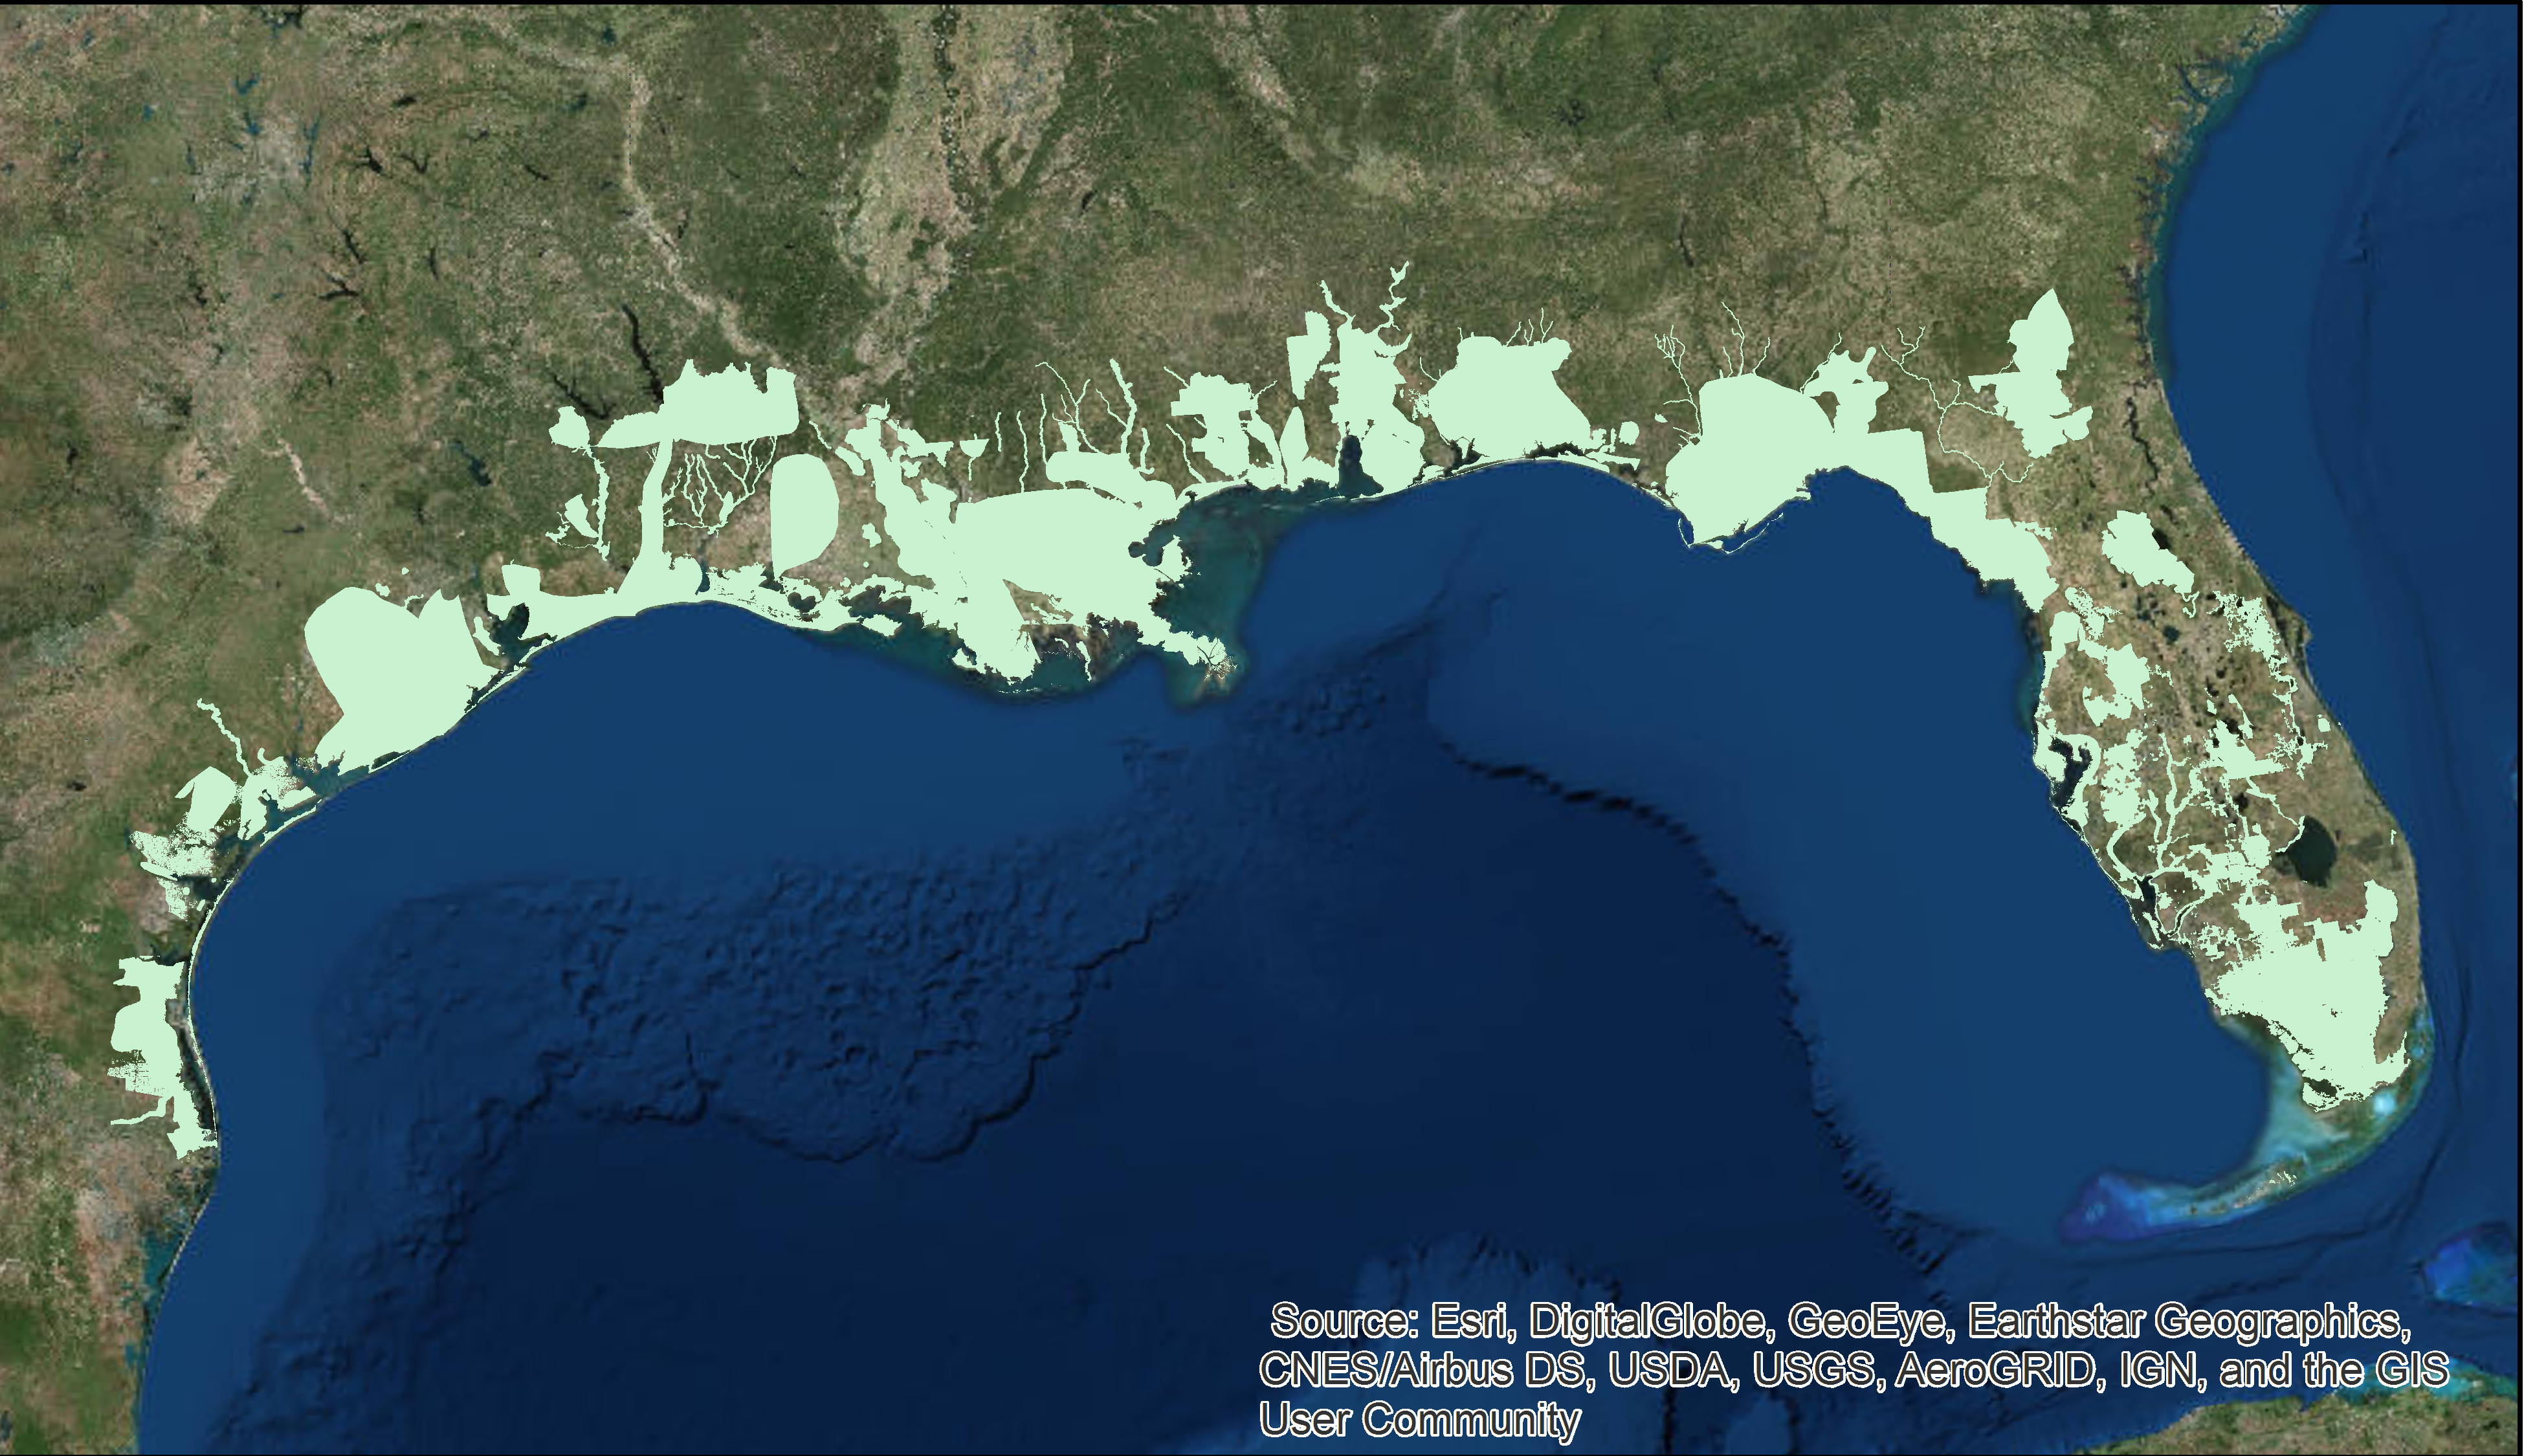

In [4]:
aoi = "T:/SmallProjects/PGCLC/pgclc.shp"
Image(filename='T:/SmallProjects/PGCLC/pgclc.png')

## Species list
A function has already been written for this type of task.  It requires access to the GAP database, a 12 digit huc layer developed by GAP, and specification of desired range attributes.  

The GAP range data has 4 attributes:

'Origin': 
 {1: 'Native',
  2: 'Introduced',
  3: 'Either introducted or native',
  4: 'Reintroduced',
  5: 'Either introduced or reintroduced',
  6: 'Vagrant',
  7: 'Unknown'},
 
 'Presence': 
 {1: 'Known/extant',
  2: 'Possibly present',
  3: 'Potential for presence',
  4: 'Extirpated/historical presence',
  5: 'Extirpated purposely (applies to introduced species only)',
  6: 'Occurs on indicated island chain',
  7: 'Unknown'},
 
 'Reproduction': 
 {1: 'Breeding',
  2: 'Nonbreeding',
  3: 'Both breeding and nonbreeding',
  7: 'Unknown'},
 
 'Season': 
 {1: 'Year-round',
  2: 'Migratory',
  3: 'Winter',
  4: 'Summer',
  5: 'Passage migrant or wanderer',
  6: 'Seasonal permanence uncertain',
  7: 'Unknown',
  8: 'Vagrant'}  

In [3]:
species = gp.gaprange.SppInAOI(AOIShp=aoi,
                               hucShp=config.hucs,
                               workDir="T:/SmallProjects/PGCLC/",
                               origin=[1,2],
                               season=[1,3,4],
                               reproduction=[1,2,3],
                               presence=[1])


Selecting HUCs that intersect with the AOI shapefile

Comparing species ranges to selected HUCs



## Results
Results are printed here and saved to csv file.

In [6]:
print("There are {0} species in the area of interest\n\n".format(len(species)))
df = pd.DataFrame(index=species)
df.index.name="gap_code"
df["scientific_name"] = [gp.gapdb.NameSci(x) for x in df.index]
df["common_name"] = [gp.gapdb.NameCommon(x) for x in df.index]
# save file
df.to_csv("T:/SmallProjects/PGCLC/PGCLC_GAP_species_29Aug2018.csv")
print(df)

There are 749 species in the area of interest


                                scientific_name                         common_name
gap_code                                                                           
aGHFRx           Eleutherodactylus planirostris                     Greenhouse Frog
aMUSAx                    Pseudotriton montanus                      Mud Salamander
aSOFRx                       Pseudacris nigrita                Southern Chorus Frog
aTWAMx                           Amphiuma means                   Two-toed Amphiuma
bAMAVx                  Recurvirostra americana                     American Avocet
bAMCRx                    Corvus brachyrhynchos                       American Crow
bAMKEx                         Falco sparverius                    American Kestrel
bAMREx                      Setophaga ruticilla                   American Redstart
bANHIx                          Anhinga anhinga                             Anhinga
bAWPEx                Peleca